# WSI LAB02 Algorytm genetyczny

### Miłosz Cieśla 325154 <br>

## Cel eksperymentu 
- Przetestowanie działania algorytmu genetycznego na zadanej funkcji(symulacja lądowania rakiety)
- Znalezienie optymalnych i działających parametrów dla niej.
- Zbadanie wpływu parametru odpowiedzialnego za mutację

## Przykładowe wywołania dla danego problemu:
Ze względu na rozkład danych rozrzuconych blisko 2 skrajnych wartości, przedstawie je za pomocą 2 wykresów pokazujących wyniki mieszczące się w przedziałach zależnych od sukcesu lądowania rakiety:

Potrzebne importy:

In [1]:
from measurements import getSolverHistories, plotHistories

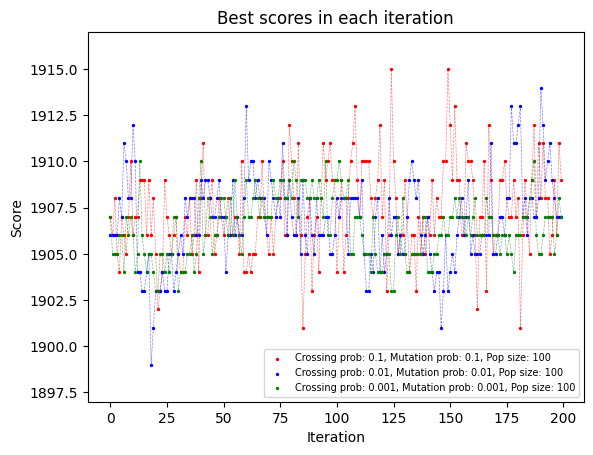

In [2]:
paramsArray = [[0.1, 0.1, 100], [0.01, 0.01, 100], [0.001, 0.001, 100]]
colorsArray = ["red", "blue", 'green']
BSHistories, avgHistories = getSolverHistories(paramsArray, 200)
plotHistories(BSHistories, paramsArray, colorsArray, "Best scores in each iteration", 1, True)

### Średnie wartości:

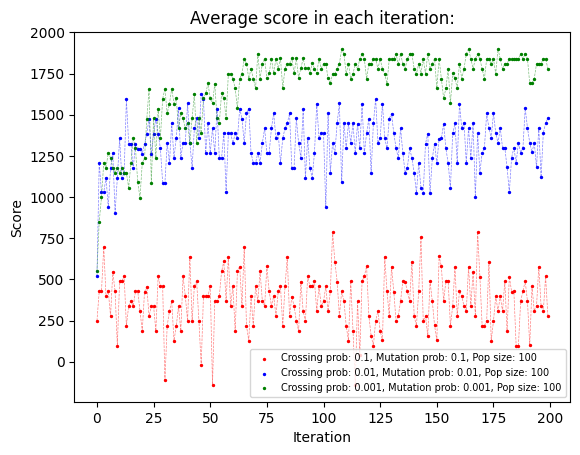

In [3]:
plotHistories(avgHistories, paramsArray, colorsArray, "Average score in each iteration:", 0, True)

Jak możemy zauważyć przykładem parametrów dających dobry wynik jest: <br>
Prawdopodobieństwo krzyżowania: 0.01 <br>
Prawdopodobieństwo mutacji: 0.01 <br>
Wielkość populacji: 100 <br>

## Badanie wpływu parametru prawdopodobieństwa mutacji na wyniki

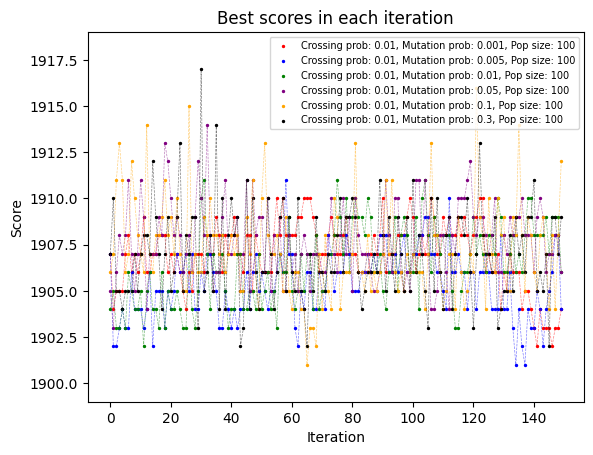

In [4]:
paramsArray = [[0.01, 0.001, 100], [0.01, 0.005, 100], [0.01, 0.01, 100], [0.01, 0.05, 100], [0.01, 0.1, 100], [0.01, 0.3, 100]]
colorsArray = ["red", "blue", 'green', 'purple', 'orange', 'black']
BSHistories, avgHistories = getSolverHistories(paramsArray, 150)
plotHistories(BSHistories, paramsArray, colorsArray, "Best scores in each iteration", 1, True)

### Średnie wartości:

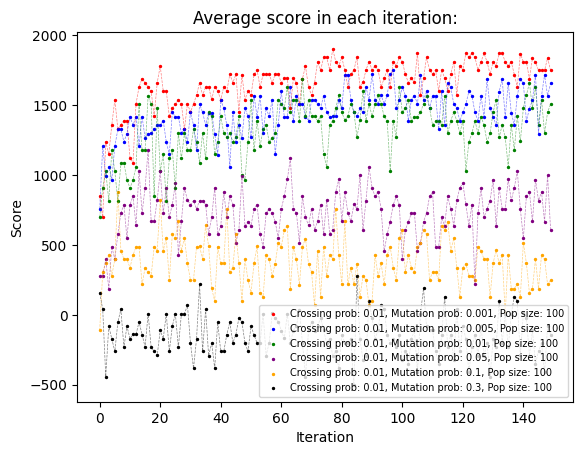

In [5]:
plotHistories(avgHistories, paramsArray, colorsArray, "Average score in each iteration:", 0, True)

### Wyniki:



In [6]:
print("Parametry: [crossProb, mutProb, popSize] Wynik: BestScore")
for i, BSHistory in enumerate(BSHistories):
    print("Parametry: ", paramsArray[i], "\t\t Wynik: ", max(BSHistory))

Parametry: [crossProb, mutProb, popSize] Wynik: BestScore
Parametry:  [0.01, 0.001, 100] 		 Wynik:  1910
Parametry:  [0.01, 0.005, 100] 		 Wynik:  1911
Parametry:  [0.01, 0.01, 100] 		 Wynik:  1911
Parametry:  [0.01, 0.05, 100] 		 Wynik:  1914
Parametry:  [0.01, 0.1, 100] 		 Wynik:  1916
Parametry:  [0.01, 0.3, 100] 		 Wynik:  1917


## Wnioski z eksperymentów oraz podsumowanie: